Project 3: (10 points)
your total (50 points) will divided by 5 to get 10 points for this project.


In this project, we will focus on the preprocessing step before building the model.

We will prepare data before making a Market basket analysis, which is an algorithm originally designed to help retailers understand and improve their businesses.

Also, we will do some important preprocessing step before building an unsupervised model for Customer Segments.

### Market Basket Analysis
---
Imagine you work for a retailer that sells dozens of products and your boss comes to you and asks the following questions:

* What products are purchased together most frequently?
* How should the products be organized and positioned in the store?
* How do we identify the best products to discount via coupons?
---
##### You might reasonably respond with complete bewilderment, as those questions are very diverse and do not immediately seem answerable using a single algorithm and dataset. However, the answer to all those questions and many more is market basket analysis.
--
### Dataset:
you can find the dataset on Canvas under Dataset section: "Online Retail.xlsx"

### Steps to do:

1- Open a Jupyter notebook.

2- Install the following libraries, if not installed, and then import them:
* matplotlib.pyplot, which is used to plot the results of the models.
* mlxtend.frequent_patterns, which is used to run the models;
* mlxtend.preprocessing, which is used to encode and prep the data for the models;
* numpy, which is used to work with arrays;
* pandas, which is used to work with DataFrames.

In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import mlxtend.frequent_patterns
import mlxtend.preprocessing
import numpy as np
import pandas as pd

3- Loading Data ( 1 point)

Load and view online retail dataset.Once you have downloaded the dataset, save it and note the path.

In [3]:
# write your code here
# Load the dataset into a DataFrame
or_df = pd.read_excel('Online Retail.xlsx')

4- Print out the first 10 rows of the DataFrame. ( 1 point)

Notice that the data contains some columns that will not be relevant to market basket analysis:

In [4]:
# write your code here
# Display the first 10 rows of the DataFrame to verify the data loading
or_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


5- Print out the data type for each column in the DataFrame. (1 point)

This information will come in handy when trying to perform specific cleaning tasks. Columns need to be of the correct type in order for filtering and computing to execute as expected:

In [5]:
# write your code here
or_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
or_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

6- Get and print the dimensions of the DataFrame, as well as the number of unique invoice numbers and customer identifications (2 points)

In [7]:
# write your code here
# Display the dimensions of the DataFrame
print("Dimensions of the DataFrame:")
print("Number of rows:", or_df.shape[0])
print("Number of columns:", or_df.shape[1])

# Get the number of unique invoice numbers and customer identifications
unique_invoices = or_df['InvoiceNo'].nunique()
unique_customers = or_df['CustomerID'].nunique()

# Print the results
print("\nNumber of Unique Invoice Numbers:", unique_invoices)
print("Number of Unique Customer Identifications:", unique_customers)


Dimensions of the DataFrame:
Number of rows: 541909
Number of columns: 8

Number of Unique Invoice Numbers: 25900
Number of Unique Customer Identifications: 4372


7- Data Cleaning and Formatting:

a. Create an indicator column stipulating whether the invoice number begins with "C". Called the column "IsCPresent" ( 1 points)

In [8]:
# Create the 'IsCPresent' column
or_df['IsCPresent'] = or_df['InvoiceNo'].astype(str).str.startswith('C')

# Save the modified DataFrame to a new file
or_df.to_csv("OnlineRetail_WithIndicator.csv", index=False)

In [9]:
# Count the number of InvoiceNo values that start with 'C'
count_C_invoices = or_df['IsCPresent'].sum()

# Display the count
print("Number of InvoiceNo values that start with 'C':", count_C_invoices)

Number of InvoiceNo values that start with 'C': 9288


In [10]:
# Create the 'IsCPresent' column
or_df['IsCPresent'] = or_df['InvoiceNo'].astype(str).apply(lambda x: x.startswith('C'))

# Save the modified DataFrame to a new file
or_df.to_csv("OnlineRetail_WithIndicator1.csv", index=False)

b. (3 points)
- Filter out all transactions having either zero or a negative number of items (in other words, items were returned),
- Remove all invoice numbers starting with "C" using the column created in previous step
- Subset the DataFrame down to InvoiceNo and Description
- Drop all rows with at least one missing value.
- Rename the DataFrame online1 and print out the first 10 rows of the filtered DataFrame, online1.

In [11]:
# write your code here
# Filter out transactions with zero or negative items
df_filtered = or_df[or_df['Quantity'] > 0]

# Display the first few rows of the filtered DataFrame
df_filtered.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCPresent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False


In [12]:
or_df.shape

(541909, 9)

In [13]:
df_filtered.shape

(531285, 9)

In [14]:
# Filter out rows with 'InvoiceNo' starting with 'C'
df_filter_c = df_filtered[~df_filtered['InvoiceNo'].astype(str).str.startswith('C')]

# Display the first few rows of the filtered DataFrame
df_filter_c.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCPresent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False


In [15]:
df_filter_c.shape

(531285, 9)

In [16]:
# Subset the DataFrame to 'InvoiceNo' and 'Description'
df_subset = df_filter_c[['InvoiceNo', 'Description']]

# Display the first few rows of the subsetted DataFrame
df_subset.head()


,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.


In [47]:
# Drop rows with at least one missing value
df_missing1 = df_filter_c.dropna()

In [48]:
df_missing2 = df_subset.dropna()

In [49]:
df_missing1.shape

(397924, 9)

In [50]:
df_missing2.shape

(530693, 2)

In [19]:
532621 - 397924

134697

In [51]:
# Rename the DataFrame to online1
online1 = df_missing1.copy().rename_axis(None)

# Print out the first 10 rows of the filtered DataFrame
online1.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCPresent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,False
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,False
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,False
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,False
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,False


In [21]:
online1.shape

(397924, 9)

In [22]:
541909 - 397924

143985

c. Approximately, how many rows and invoice numbers have already removed? ( 2 points)
 - Answer- Intially total number of rows - 541909
 - after filter no of rows - 397924
 - Total rows removed- 143985 which includes 9288  invoice numbers rows starting with 'C'


--
### Edit to write your answer here

In [23]:
#write your code here to prove your answer:
# Calculate the difference in the number of rows
row_difference = len(or_df) - len(online1)

# Print the result
print("The difference in the number of rows is:", row_difference)

The difference in the number of rows is: 143985


d. (2 points)
- Extract the invoice numbers from the DataFrame as a list.
- Remove duplicate elements to create a list of unique invoice numbers.
- Confirm that the process was successful by printing the length of the list of unique invoice numbers.

In [24]:
# write your code here
# Extract the "InvoiceNo" column as a list
invoice_no_list = online1['InvoiceNo'].tolist()

# Use set to remove duplicates and then convert it back to a list
unique_invoice_numbers = list(set(invoice_no_list))


# Print the length of the list of unique invoice numbers
print("Length of the list of unique invoice numbers:", len(unique_invoice_numbers))


Length of the list of unique invoice numbers: 18536


e. Take the list from step d and cut it to only include the first 5,000 elements. Print out the length of the new list to confirm that it is, in fact, the expected length of 5,000( 1 point)

In [25]:
# write your code here
# Take the first 5,000 elements of the list
cut_invoice_numbers = unique_invoice_numbers[:5000]

# Print the length of the new list
print("Length of the new list after cutting:", len(cut_invoice_numbers))

Length of the new list after cutting: 5000


f. Filter the online1 DataFrame down by only keeping the invoice numbers in the list from step e and print out the first 10 rows of online1( 1 point)

In [26]:
# write your code here
# Filter the online1 DataFrame to only include rows with invoice numbers in the cut_invoice_numbers list
filtered_online1 = online1[online1['InvoiceNo'].isin(cut_invoice_numbers)]

# Print out the first 10 rows of the filtered DataFrame
print(filtered_online1.head(10))

       InvoiceNo StockCode                          Description  Quantity  \
229435    557056     23240    SET OF 4 KNICK KNACK TINS DOILEY         12   
229436    557057     21394                 RED POLKADOT BEAKER         96   
229437    557057     21395                BLUE POLKADOT BEAKER         96   
229438    557057     21530                 DAIRY MAID TOASTRACK        36   
229439    557057     21403                      BLUE EGG  SPOON        48   
229440    557057     21402                      RED  EGG  SPOON        48   
229441    557057     21990         MODERN FLORAL STATIONERY SET        24   
229442    557057     21993           FLORAL FOLK STATIONERY SET        24   
229443    557057     22062  CERAMIC BOWL WITH LOVE HEART DESIGN        18   
229444    557057     22208             WOOD STAMP SET THANK YOU        24   

               InvoiceDate  UnitPrice  CustomerID         Country  IsCPresent  
229435 2011-06-16 14:46:00       4.15     12621.0         Germany       

g. Print out the dimensions of the DataFrame (online1) and the number of unique invoice numbers to confirm that the filtering and cleaning process was successful (1 point)

In [27]:
# write your code here
# Print the dimensions of the filtered DataFrame (number of rows and columns)
print("Dimensions of the filtered DataFrame (rows, columns):", filtered_online1.shape)

# Print the number of unique invoice numbers in the filtered DataFrame
num_unique_invoice_numbers = filtered_online1['InvoiceNo'].nunique()
print("Number of unique invoice numbers:", num_unique_invoice_numbers)


Dimensions of the filtered DataFrame (rows, columns): (105465, 9)
Number of unique invoice numbers: 5000


h. Transform the data in online1 into the aforementioned list of lists called invoice_item_list. The process for doing this is to iterate over the unique invoice numbers and, at each iteration, extract the item descriptions as a list and append that list to the larger invoice_item_list list. Print out elements one through four of the list (2 points)

In [28]:
# write your code here

# Initialize the list to store lists of item descriptions for each invoice
invoice_item_list = []

# Iterate over unique invoice numbers
for invoice_number in filtered_online1['InvoiceNo'].unique():
    # Extract item descriptions as a list for each invoice
    items_for_invoice = filtered_online1.loc[filtered_online1['InvoiceNo'] == invoice_number, 'Description'].tolist()
    
    # Append the list to the larger invoice_item_list
    invoice_item_list.append(items_for_invoice)

# Print elements one through four of the list
print("Elements one through four of invoice_item_list:")
for i in range(4):
    print(invoice_item_list[i])

Elements one through four of invoice_item_list:
['SET OF 4 KNICK KNACK TINS DOILEY ']
['RED POLKADOT BEAKER ', 'BLUE POLKADOT BEAKER ', 'DAIRY MAID TOASTRACK', 'BLUE EGG  SPOON', 'RED  EGG  SPOON', 'MODERN FLORAL STATIONERY SET', 'FLORAL FOLK STATIONERY SET', 'CERAMIC BOWL WITH LOVE HEART DESIGN', 'WOOD STAMP SET THANK YOU', 'WOOD STAMP SET HAPPY BIRTHDAY', 'PENS ASSORTED SPACEBALL', 'PENS ASSORTED FUNNY FACE', 'PENS ASSORTED FUNKY JEWELED ', 'SCOTTIE DOGS BABY BIB', 'CHARLIE AND LOLA TABLE TINS', 'CHARLIE & LOLA WASTEPAPER BIN FLORA', 'CHARLIE & LOLA WASTEPAPER BIN BLUE', 'CHARLIE AND LOLA FIGURES TINS', 'TV DINNER TRAY DOLLY GIRL', 'SET/20 RED RETROSPOT PAPER NAPKINS ', 'MINT KITCHEN SCALES', 'RED KITCHEN SCALES', '36 FOIL HEART CAKE CASES', '36 FOIL STAR CAKE CASES ', 'ILLUSTRATED CAT BOWL ', 'POTTING SHED TEA MUG', 'CERAMIC STRAWBERRY DESIGN MUG', 'RED RETROSPOT SHOPPER BAG', 'BUTTON BOX ', 'MINI CAKE STAND  HANGING STRAWBERY', 'LUNCH BAG DOILEY PATTERN ', 'JUMBO BAG STRAWBERRY', '

8- Data Encoding

While cleaning the data is crucial, the most important part of the data preparation process is molding the data into the correct form. Before running the models, the data, currently in the list of lists form, needs to be encoded and recast as a DataFrame.

To do this, we will leverage TransactionEncoder from the preprocessing module of mlxtend. The output from the encoder is a multidimensional array, where each row is the length of the total number of unique items in the transaction dataset and the elements are Boolean variables, indicating whether that particular item is linked to the invoice number that row represents. With the data encoded, we can recast it as a DataFrame where the rows are the invoice numbers and the columns are the unique items in the transaction dataset.

The data encoding will be done using mlxtend, but if you wish to encode the data without using a package, you are free.

More info about mlxtend in the link: https://rasbt.github.io/mlxtend/

a. Initialize and fit the transaction encoder. Print out an example of the resulting data. (2 points)

In [68]:
# write your code here

from mlxtend.preprocessing import TransactionEncoder
import numpy as np

"""te = TransactionEncoder()
te.fit(invoice_item_list)
online_te = te.transform(invoice_item_list)
online_encoder_df = pd.DataFrame(online_te, columns=te.columns_)
print(online_encoder_df.head())"""


te = TransactionEncoder()
te_ary = te.fit_transform(invoice_item_list)
print(te_ary[0:5, :])

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


b. Recast the encoded array as a DataFrame named online_encoder_df. Print the predefined subset of the DataFrame that features both True and False values (2 points)

In [69]:
# write your code here
online_encoder_df = pd.DataFrame(te_ary, columns=te.columns_)
print(online_encoder_df.loc[:, online_encoder_df.nunique() > 1].head())

    4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
0                           False                           False   
1                           False                           False   
2                           False                           False   
3                           False                           False   
4                           False                           False   

    DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK   NINE DRAWER OFFICE TIDY  \
0               False                         False                     False   
1               False                         False                     False   
2               False                         False                     False   
3               False                         False                     False   
4               False                         False                     False   

    OVAL WALL MIRROR DIAMANTE    RED SPOT GIFT BAG LARGE  \
0                        False        

c. Print out the dimensions of the encoded DataFrame. It should have 5,000 rows because the data used to generate it was previously filtered down to 5,000 unique invoice numbers. (1 point)

In [70]:
# write your code here
print("Dimensions of encoded DataFrame:", online_encoder_df.shape)


Dimensions of encoded DataFrame: (5000, 3131)


#### The data is now prepared for modeling.
---

### Wholesale Data

we will analyze a dataset containing data on various customers' annual spending amounts (reported in monetary units) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

--
### Dataset:
you can find the dataset on Canvas under Dataset section: "wholesale_customers_data.csv"

In [29]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
from numpy.random import uniform, multivariate_normal, rand, randn, seed
from itertools import repeat
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec
from matplotlib.colors import to_rgba
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import jarque_bera, normaltest
import matplotlib.pyplot as plt
import scipy.stats as stats


1. Load the wholesale customers dataset (1 point)

In [30]:
# write your code here
ws_df = pd.read_csv('wholesale_customers_data.csv')

2. Drop Channel & Region and print the current columns ( 1 point)

In [33]:
# write your code here
drop_ws_df = ws_df.drop(['Channel', 'Region'], axis = 1)
drop_ws_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


### Data Exploration:

You will begin exploring the data through visualizations and code to understand how each feature is related to the others.



3. Show a statistical summary for each of the above product categories. (1 point)

In [34]:
# write your code here
drop_ws_df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


4. Show a visual representation of the distribution of each feature in the data.using histogram and normal probability plot. (2 points)

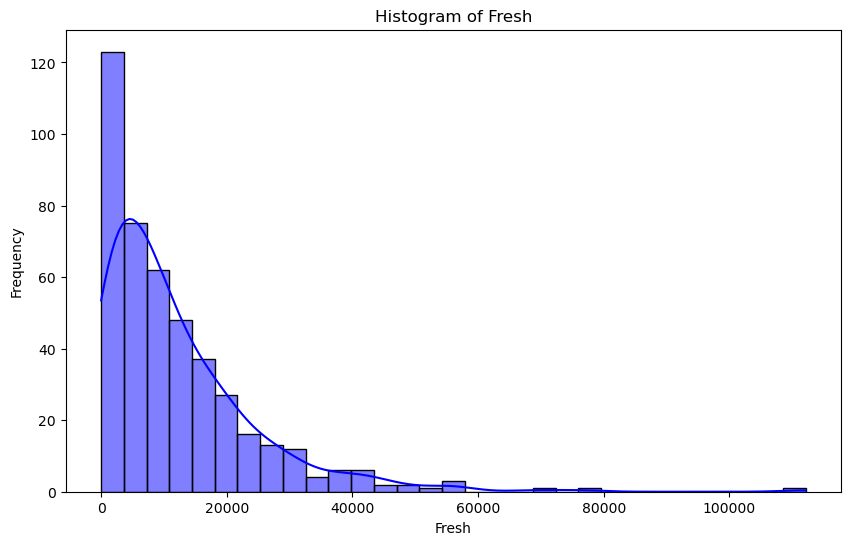

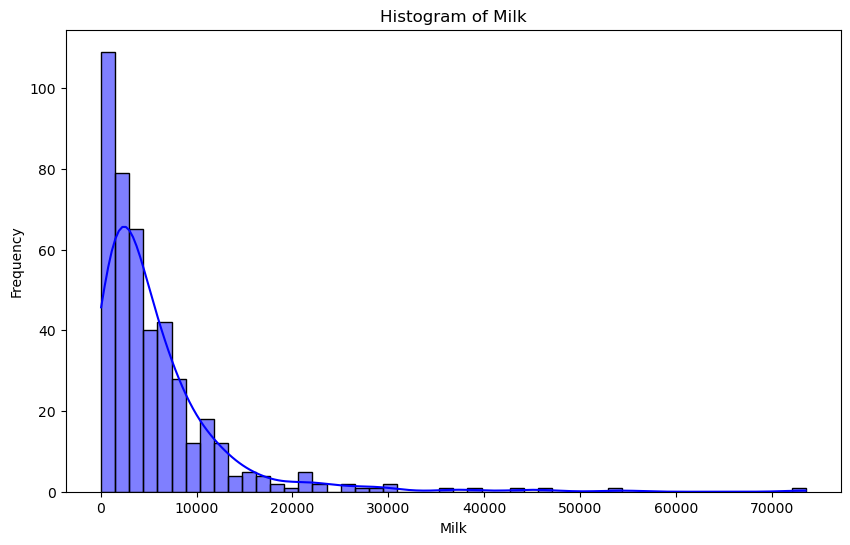

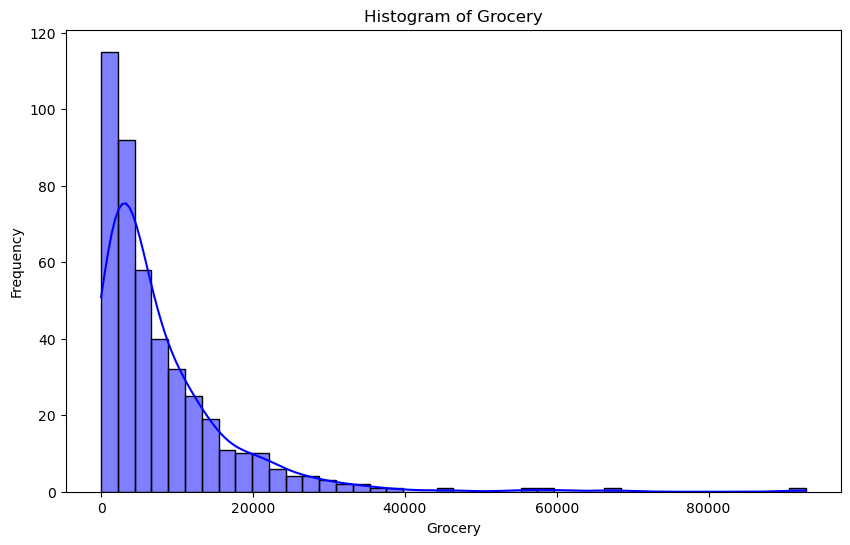

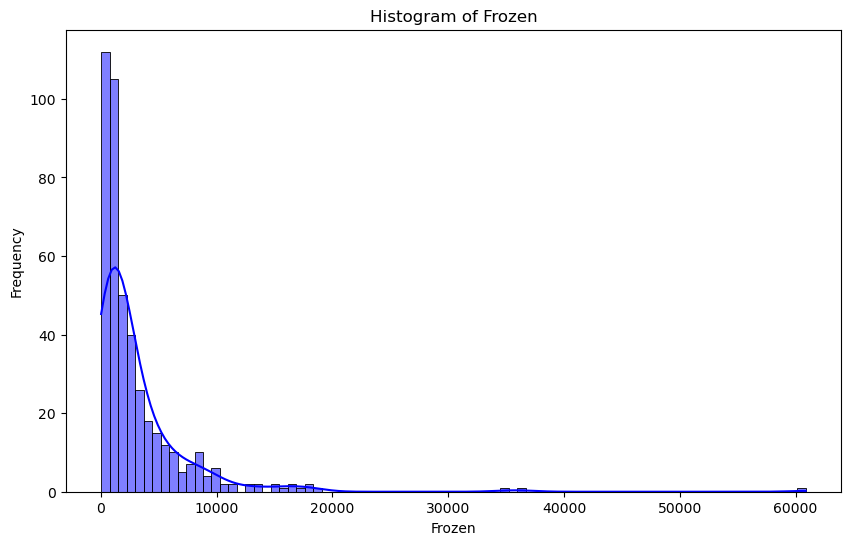

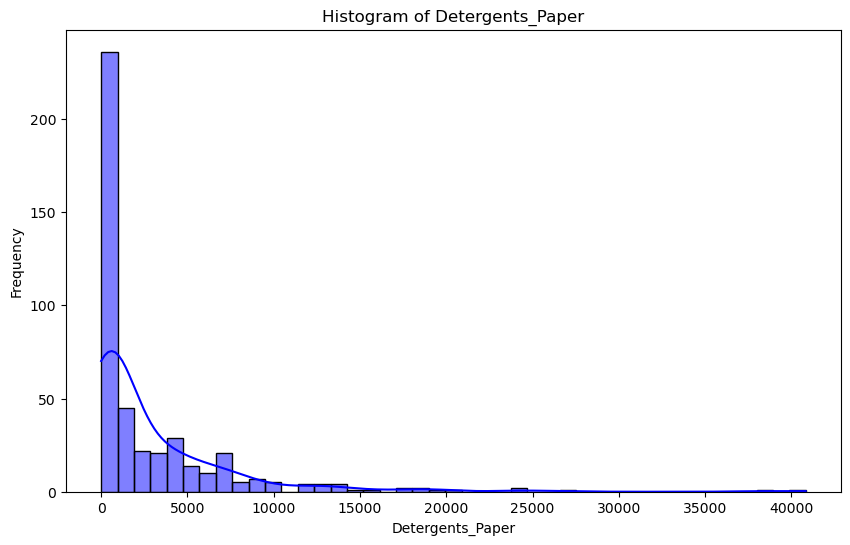

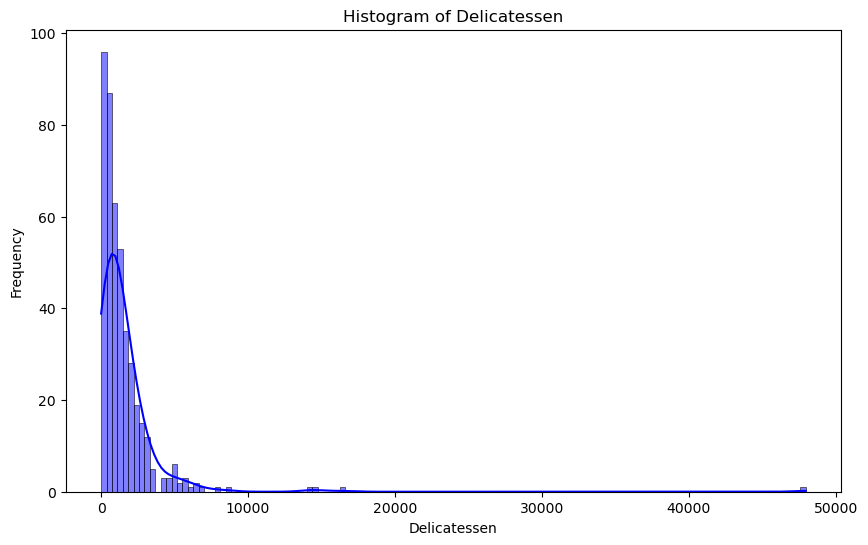

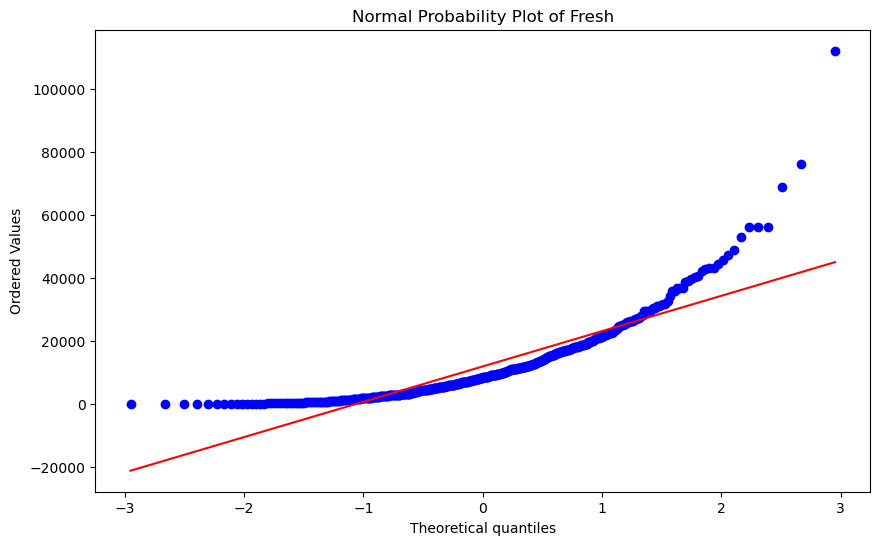

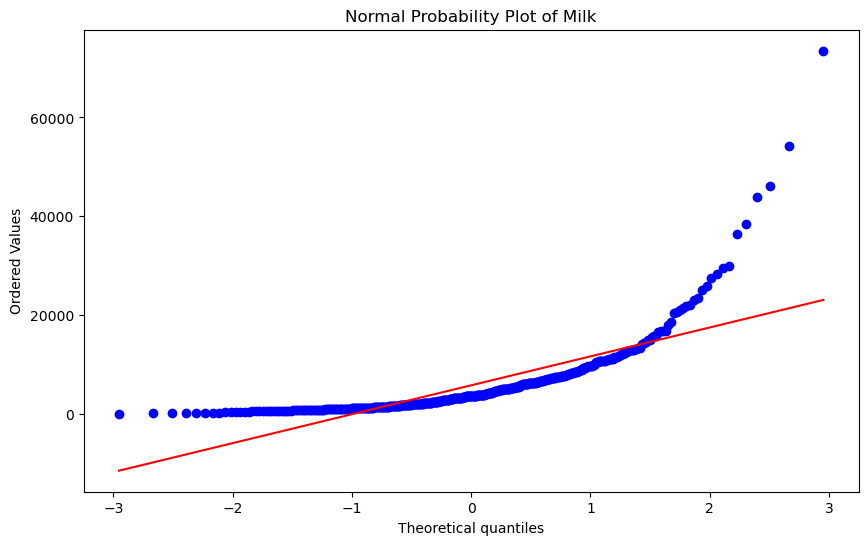

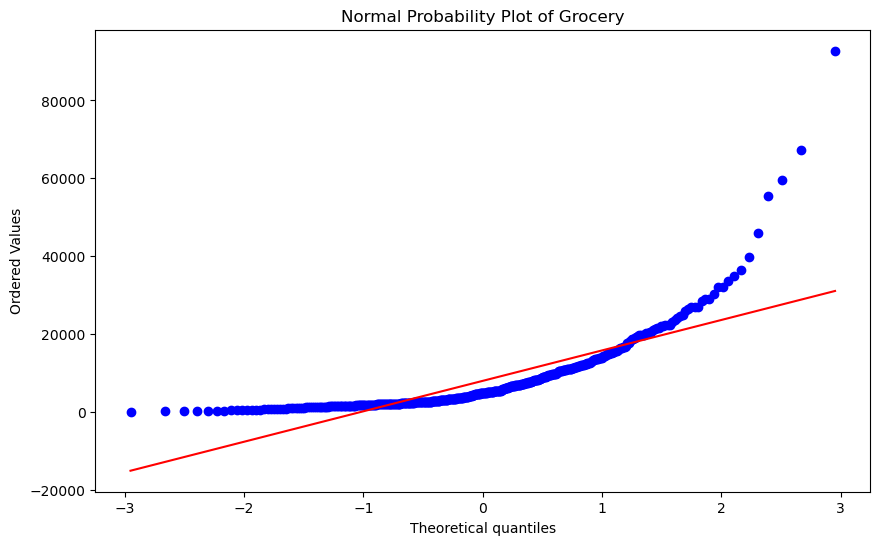

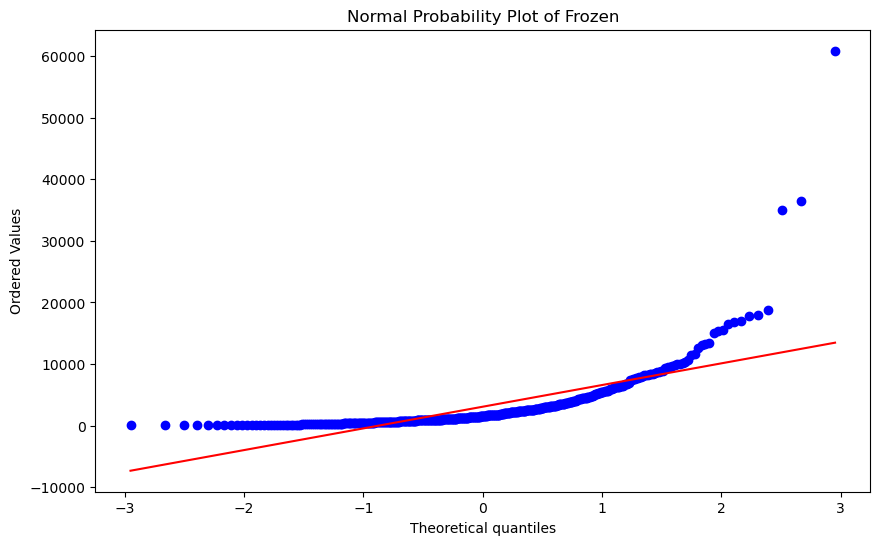

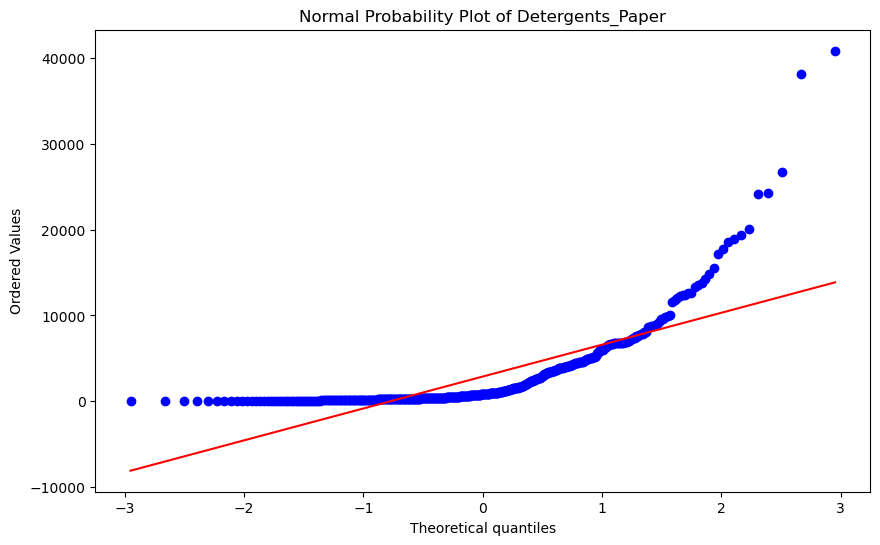

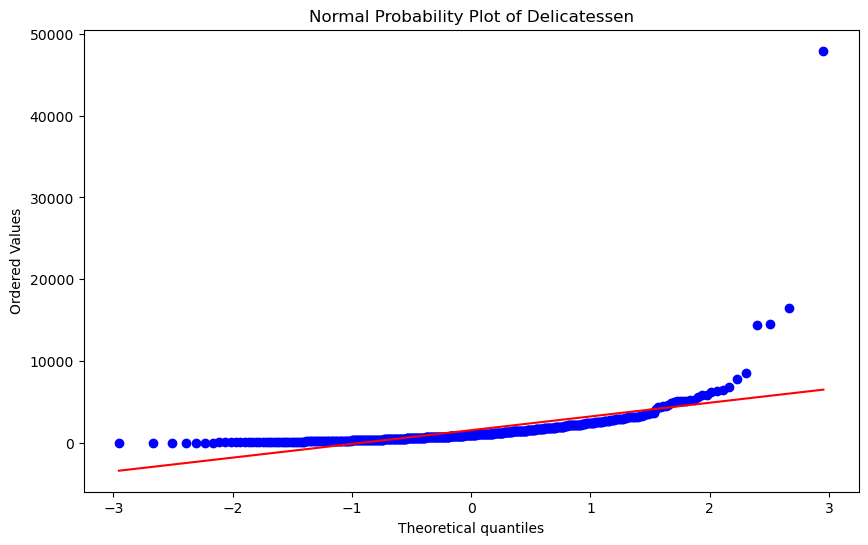

In [36]:
# write your code here

# Loop through columns and create plots
from scipy.stats import probplot
# Plot histograms for each feature
for column in drop_ws_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(drop_ws_df[column], kde=True, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot normal probability plots for each feature
for column in drop_ws_df.columns:
    plt.figure(figsize=(10, 6))
    probplot(drop_ws_df[column], plot=plt)
    plt.title(f'Normal Probability Plot of {column}')
    plt.show()

5. What do you observe about distribution? (2 points)


    -Answer 
    -The following distribution features are revealed by examining the histograms and normal probability plots for every feature      in the wholesale_customers DataFrame:

    -i. New: The histogram shows non-normality due to a skewed distribution that is mostly concentrated on the left side. This           observation is supported by the normal probability plot, which displays notable deviations from a straight line.

    -ii. Milk: A skewed distribution is visible in the histogram, although it is not as noticeable as it is for Fresh. Although          they are not as noticeable as they are for Fresh, deviations from normalcy are also seen in the normal probability              plot. This implies that, in contrast to Fresh, the Milk feature is more closely distributed toward normality.
    
    -iii. Grocery: A more symmetric distribution is shown by the histogram, with values centered in the middle, suggesting some           degree of normalcy. In comparison to the Fresh and Milk features, the normal probability plot exhibits less variation           from a straight line, indicating that the Grocery feature is comparatively closer to normal.

     -iv. Frozen: The values are concentrated on the left side of the histogram, indicating a skewed distribution akin to Fresh.           The normal probability plot, which shows notable departures from a straight line, verifies non-normality.

      -v. Detergents_Paper: Grocery-like distribution is more symmetrical in this histogram. In comparison to Fresh and Frozen,           the normal probability plot shows less deviation from normalcy, suggesting that the Detergents_Paper characteristic is           comparatively closer to normal.
      
      -vi. Delicassen: A skewed distribution that is concentrated on the left side of the histogram indicates non-normality.                This observation is supported by the normal probability plot, which shows notable deviations from a straight line.

       -To sum up, not a single variable displays a normal distribution; nevertheless, several features, including Grocery and           Detergents_Paper, have a greater resemblance to normality than others. These properties of the distribution must be             taken into account when building models that presume normalcy or performing statistical tests.



6. Scale the sample data using the natural logarithm ( 1 point)

In [38]:
# Scale the data using the natural logarithm
# Scale the data using natural logarithm
drop_ws_df_log = np.log(drop_ws_df)
drop_ws_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


7. Check for Outliers using boxplot ( 2 points)

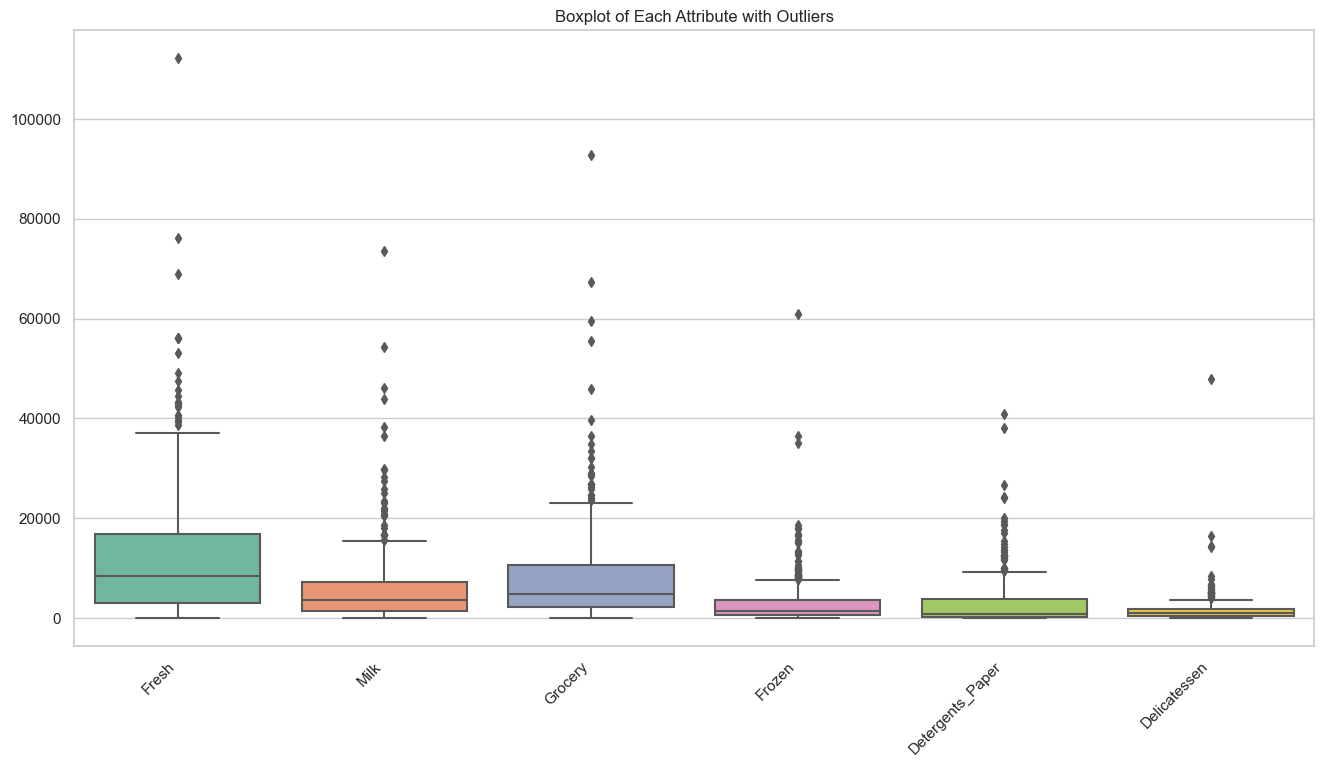

In [40]:
# write your code here
# Set the style for the plot
sns.set(style="whitegrid")

# Create a boxplot for each column with different colors
plt.figure(figsize=(16, 8))
sns.boxplot(data=drop_ws_df, palette="Set2")
plt.title('Boxplot of Each Attribute with Outliers')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.show()

8. Apply natural log to transform long tails and plot the Log Sales Distribution using violinplot (2 points)

In [41]:
# write your code here
# Apply natural logarithm to 'Sales' column
log_ws_df = np.log1p(drop_ws_df)
log_ws_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446992,9.175438,8.930891,5.370638,7.891705,7.199678
1,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682
2,8.756840,9.083529,8.947026,7.785721,8.165364,8.967632
3,9.492960,7.087574,8.348064,8.764834,6.230481,7.489412
4,10.026413,8.596189,8.881697,8.272826,7.483244,8.553718


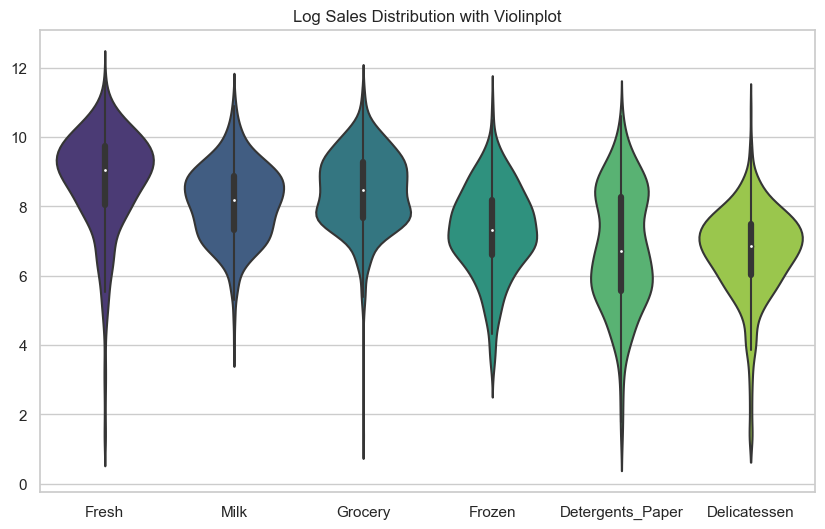

In [55]:
# write your code here
import seaborn as sns
# Create a violinplot for the log-transformed 'Sales'
plt.figure(figsize=(10, 6))
sns.violinplot(data=log_ws_df, palette="viridis")
plt.title('Log Sales Distribution with Violinplot')
plt.show()

9. Remove Outliers using LocalOutlierFactor and plot the Log Sales Distribution using violinplot after removing the outliers. (2 points)

In [71]:
# write your code here
# Extract the column you want to analyze (e.g., 'Sales')
data_to_analyze = log_ws_df

# Initialize the Local Outlier Factor model
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # Adjust parameters as needed

# Fit the model and predict outliers
outlier_scores = lof_model.fit_predict(data_to_analyze)

# Create a boolean mask to filter out outliers
outlier_mask = outlier_scores == 1  # -1 indicates an outlier

# Remove outliers from the DataFrame
drop_ws_df_no_outliers = drop_ws_df[outlier_mask]

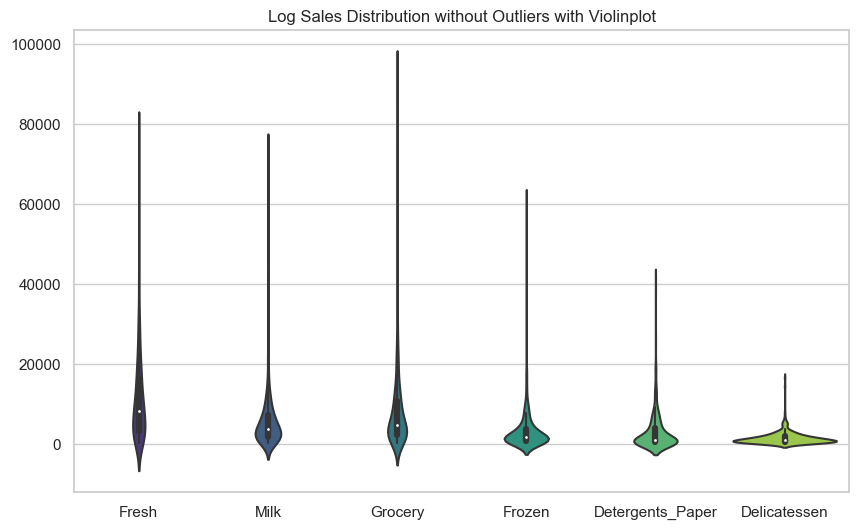

In [72]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a violinplot for the log-transformed 'Sales' without outliers
plt.figure(figsize=(10, 6))
sns.violinplot(data=drop_ws_df_no_outliers, palette="viridis")
plt.title('Log Sales Distribution without Outliers with Violinplot')
plt.show()

10. use sns.pairplot to visualize Feature Distributions in your cleaned data (2 points)

C:\Users\mansi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


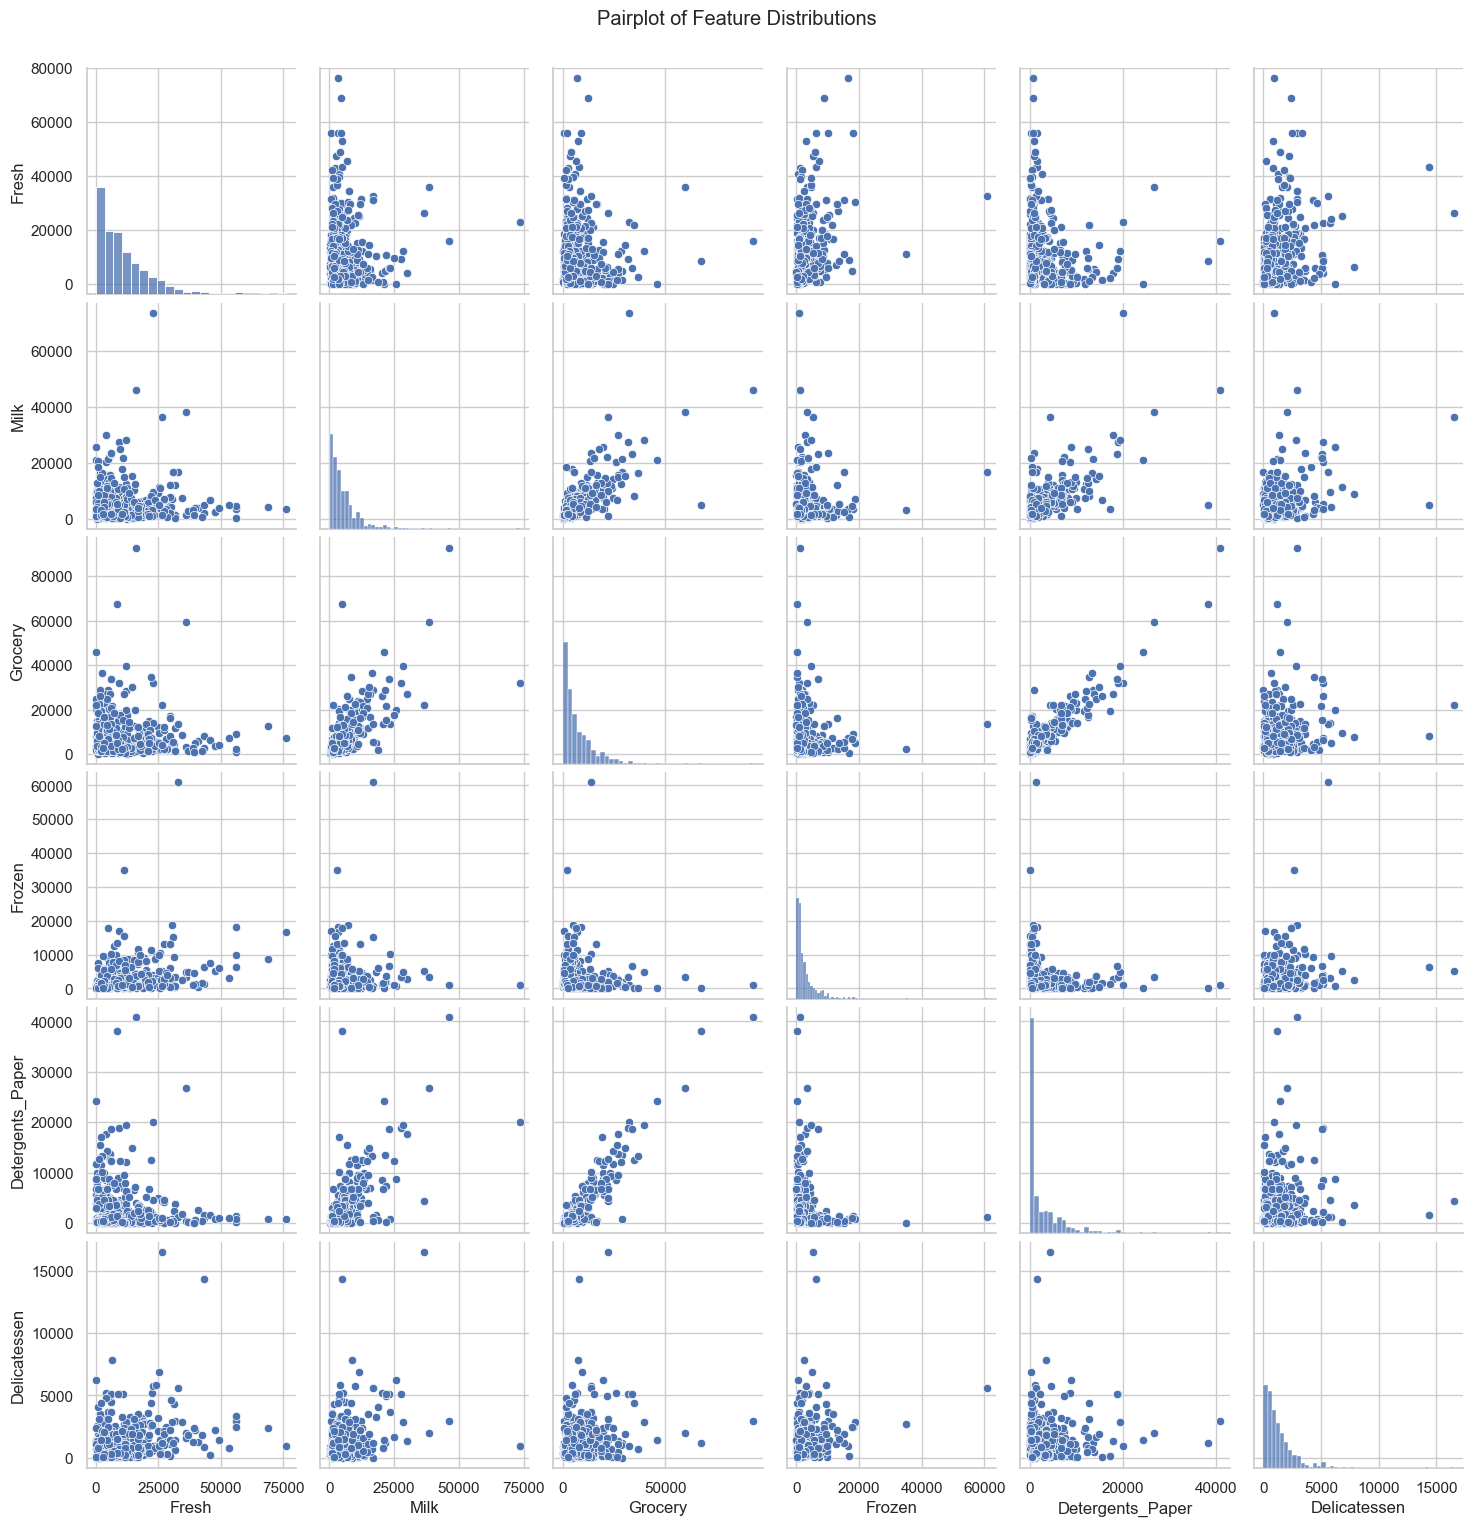

In [57]:
# write your code here
# Create a pairplot to visualize feature distributions
sns.pairplot(drop_ws_df_no_outliers)
plt.suptitle('Pairplot of Feature Distributions', y=1.02)
plt.show()

11. Check for Correlations using sns.clustermap (2 points)

<Figure size 1200x1000 with 0 Axes>

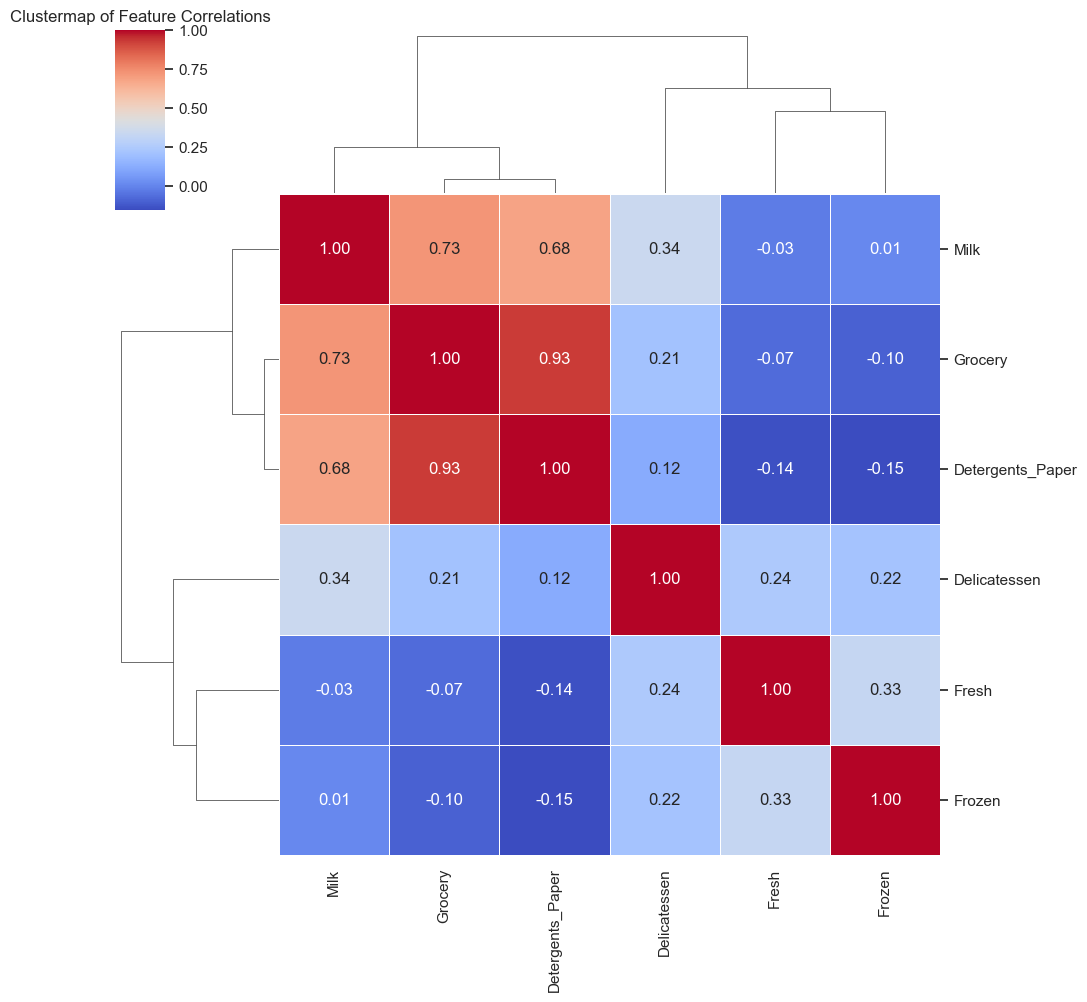

In [58]:
# write your code here
# Calculate the correlation matrix
correlation_matrix = drop_ws_df_no_outliers.corr()

# Create a clustermap to visualize correlations
plt.figure(figsize=(12, 10))
sns.clustermap(correlation_matrix, cmap='coolwarm', annot=True, linewidths=.5, fmt=".2f")
plt.title('Clustermap of Feature Correlations')
plt.show()

12. What do you observe? (2 points)


When the correlation matrix is visualized using a clustermap, the following observations may be made:

i. The data indicates a significant positive connection between "Grocery" and "Detergents_Paper," suggesting that a rise in sales of one characteristic is likely to be matched by a rise in the other. Strong evidence for this association may be found in the 0.92 correlation coefficient.

ii. "Milk" shows a strong association with both "Grocery" and "Detergents_Paper," albeit to a less extent than the correlation between the two.

iii. "Fresh" has comparatively weak connections with every other attribute; "Frozen" has the strongest association (0.35). This implies that the sales of other product categories do not have a significant impact on the sales of "Fresh" items.

iv. It is clear that "Delicatessen" and "Frozen," as well as "Milk" and "Delicatessen," have weakly positive connections.



### PCA
Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the cleaned data to discover which dimensions about the data best maximize the variance of features involved.

13. Biplot: Visualizing Product Relationships in 2D (2 points)

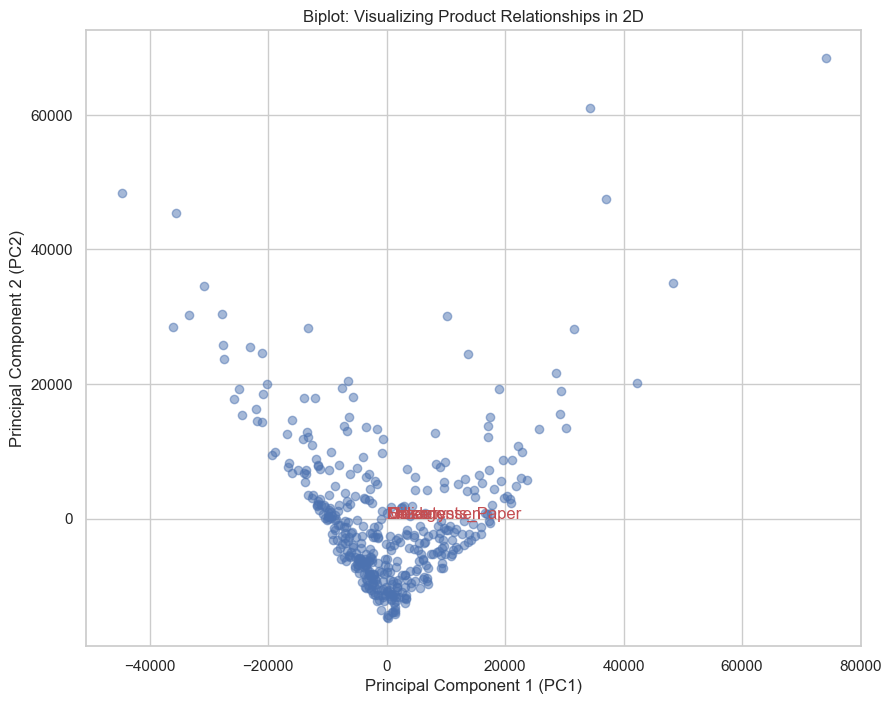

In [64]:
# write your code here

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
biplot_data = pca.fit_transform(drop_ws_df_no_outliers)

# Create a DataFrame for the biplot data
biplot_df = pd.DataFrame(biplot_data, columns=['PC1', 'PC2'])

# Add the original feature names to the DataFrame
biplot_df = pd.concat([biplot_df, drop_ws_df_no_outliers], axis=1)

# Plot the biplot
plt.figure(figsize=(10, 8))
plt.scatter(biplot_df['PC1'], biplot_df['PC2'], alpha=0.5)

# Add variable vectors to the plot
for i, feature in enumerate(drop_ws_df_no_outliers):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.8)
    plt.text(pca.components_[0, i] * 1.2, pca.components_[1, i] * 1.2, feature, color='r')

# Add labels and title
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('Biplot: Visualizing Product Relationships in 2D')

plt.grid(True)
plt.show()

14. Use sns.jointplot to plot x and y in the above code (2 points)

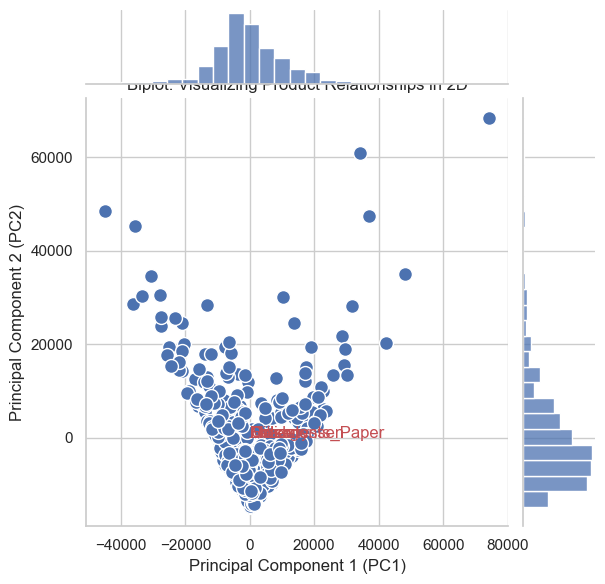

In [65]:
# write your code here
# Create a jointplot
sns.set(style="whitegrid")
sns.jointplot(x='PC1', y='PC2', data=biplot_df, kind='scatter', marginal_kws=dict(bins=25), s=100, edgecolor="w", linewidth=1)

# Add variable vectors to the plot
for i, feature in enumerate(drop_ws_df_no_outliers):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.8)
    plt.text(pca.components_[0, i] * 1.2, pca.components_[1, i] * 1.2, feature, color='r')

# Add labels and title
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('Biplot: Visualizing Product Relationships in 2D')

plt.show()

15. Exploring the new Descriptors of the cleand Data using plot.bar (2 points)

<Figure size 1200x800 with 0 Axes>

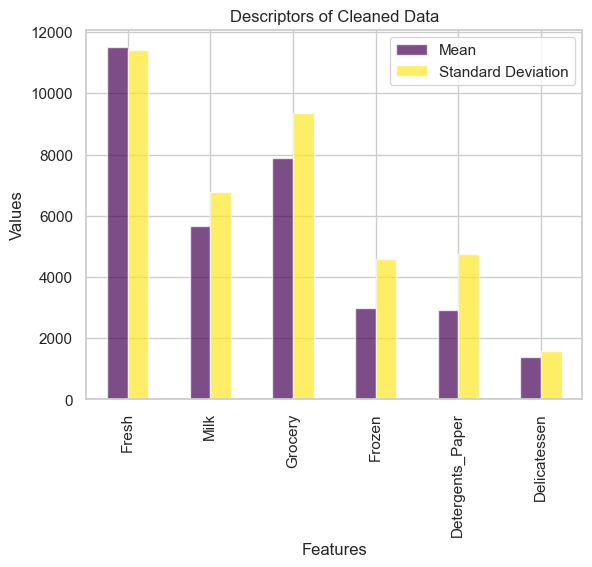

In [66]:
# write your code here
# Calculate descriptors for each feature
descriptors_df = drop_ws_df_no_outliers.describe().loc[['mean', 'std']]

# Transpose the DataFrame for better visualization
descriptors_df = descriptors_df.transpose()

# Plot bar chart
plt.figure(figsize=(12, 8))
descriptors_df.plot(kind='bar', y=['mean', 'std'], alpha=0.7, colormap='viridis')
plt.title('Descriptors of Cleaned Data')
plt.xlabel('Features')
plt.ylabel('Values')
plt.legend(["Mean", "Standard Deviation"])
plt.show()

16. How much approximately the first and second features of explain of variance in total? (1 point)



In [67]:
# Print explained variance ratio for the first and second principal components
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio (PC1): {explained_variance_ratio[0]:.4f}")
print(f"Explained Variance Ratio (PC2): {explained_variance_ratio[1]:.4f}")

# Print total explained variance for the first and second principal components
total_explained_variance = explained_variance_ratio[0] + explained_variance_ratio[1]
print(f"Total Explained Variance (PC1 + PC2): {total_explained_variance:.4f}")

Explained Variance Ratio (PC1): 0.4687
Explained Variance Ratio (PC2): 0.4022
Total Explained Variance (PC1 + PC2): 0.8709


---
## All set

Please make sure you execute each cell before you submit your file; this is important because if your code didn't work on our machine for an unknown reason, it would be better to see the result rather than losing some points or wasting time to contact you to fix this issue.

What to submit:

* Your Jupyter Notebook file.
* Name your file as firstname_lastname_pj_3 .
---